In [58]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import matplotlib.dates as mdates

import time
import seaborn as sns

import random
import matplotlib.dates as mdates #dates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set()

In [2]:
plt.style.use('seaborn')

In [3]:
data = pd.read_csv('jigsaw-multilingual-toxic-comment-classification/jigsaw-unintended-bias-train.csv')

In [4]:
data.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

Create seperate features of hour, day, month, year.

In [127]:
import datetime as dt
data['created_date'] = pd.to_datetime(data['created_date'])

In [130]:
type(data.created_date[1])

pandas._libs.tslibs.timestamps.Timestamp

In [131]:
#extract year
data['created_year'] = data['created_date'].dt.year

In [132]:
#extract day
data['created_day'] = data['created_date'].dt.day

In [133]:
#extract month
data['created_month'] = data['created_date'].dt.month

In [135]:
#extract hour
data['created_hour'] = data['created_date'].dt.hour

In [136]:
data.head(2)

,id,comment_text,toxic,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,created_date_dt,dates,created_year,created_day,created_month,created_hour
0,59848,"This is so cool. It's like, 'would you want yo...",0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0,0.0,0,4,2015-09-29 10:50:41.987077+00:00,2015-09-29 10:50:41.987077+00:00,2015,29,9,10
1,59849,Thank you!! This would make my life a lot less...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0,0.0,0,4,2015-09-29 10:50:42.870083+00:00,2015-09-29 10:50:42.870083+00:00,2015,29,9,10


In [137]:
data['created_hour'].min()

0

In [138]:
data['created_hour'].max()

23

In [197]:
tox_by_month = data.groupby('created_month').mean()['toxic'].reset_index()
tox_by_month.round(2)

,created_month,toxic
0,1,0.11
1,2,0.10
2,3,0.09
3,4,0.10
4,5,0.10
5,6,0.10
6,7,0.10
7,8,0.11
8,9,0.11
9,10,0.11


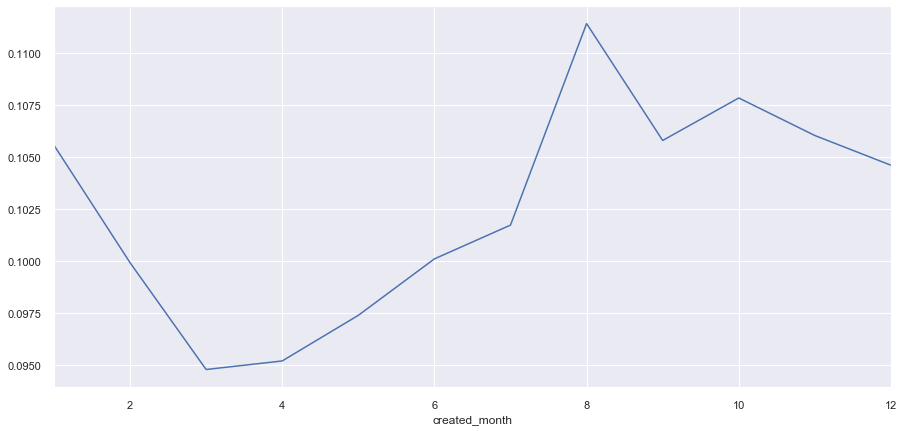

In [205]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby('created_month').mean()['toxic'].plot(ax=ax);

In [150]:
tox_by_year = data.groupby('created_year').mean()['toxic'].reset_index()
tox_by_year.round(2)

,created_year,toxic
0,2015,0.06
1,2016,0.10
2,2017,0.10


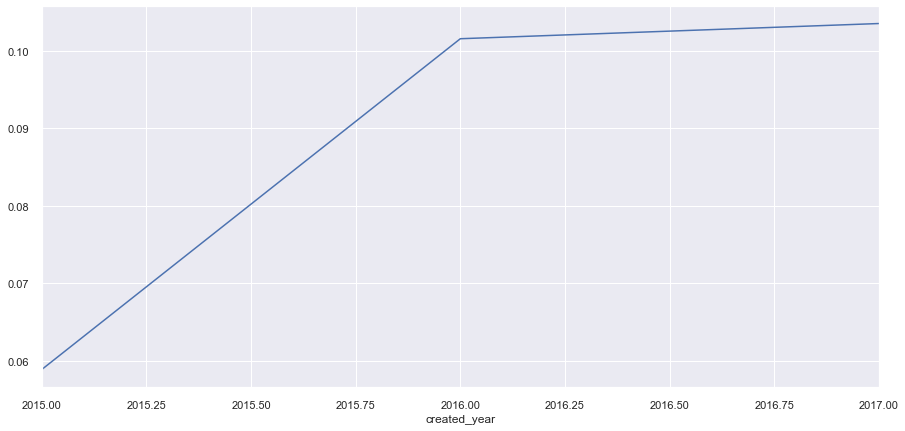

In [206]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby('created_year').mean()['toxic'].plot(ax=ax);

In [143]:
tox_by_hour = data.groupby('created_hour').mean()['toxic'].reset_index()
tox_by_hour.round(2)

,created_hour,toxic
0,0,0.11
1,1,0.11
2,2,0.11
3,3,0.11
4,4,0.11
5,5,0.11
6,6,0.11
7,7,0.11
8,8,0.11
9,9,0.11


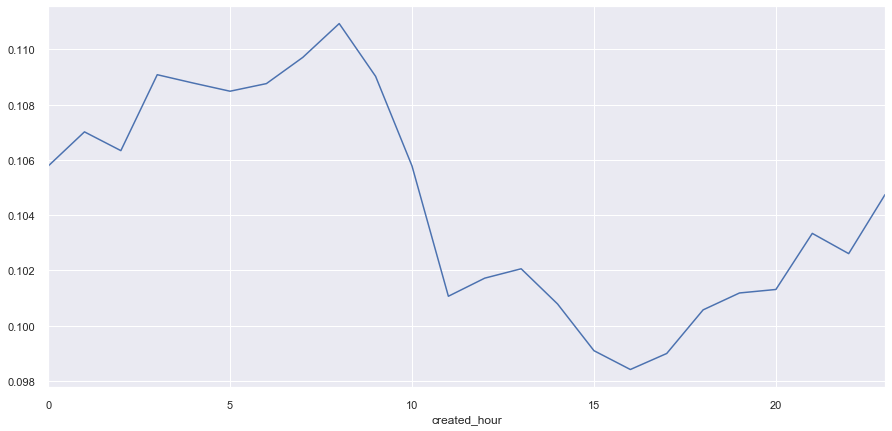

In [188]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby('created_hour').mean()['toxic'].plot(ax=ax)

In [144]:
tox_by_day = data.groupby('created_day').mean()['toxic'].reset_index()
tox_by_day.round(2)

,created_day,toxic
0,1,0.10
1,2,0.10
2,3,0.10
3,4,0.10
4,5,0.10
5,6,0.10
6,7,0.10
7,8,0.10
8,9,0.10
9,10,0.10


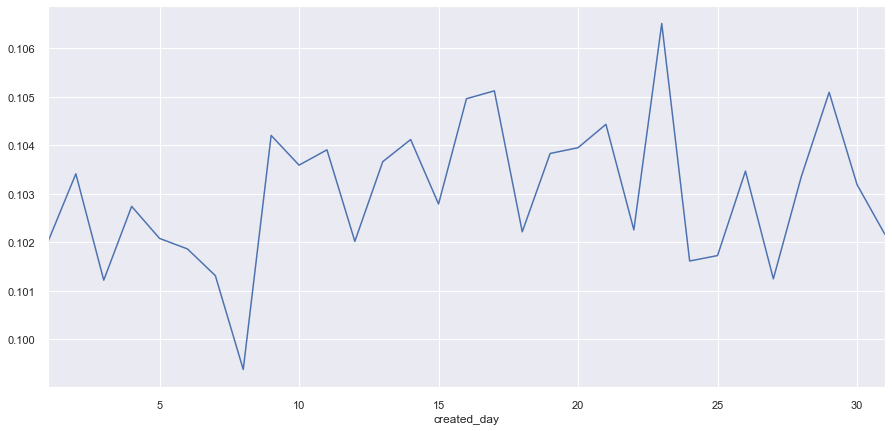

In [207]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby('created_day').mean()['toxic'].plot(ax=ax);

Times with highest comment frequency:

In [165]:
data['created_hour'].mode()

0    17
dtype: int64

In [162]:
data['created_day'].mode()

0    6
dtype: int64

In [163]:
data['created_month'].mode()

0    10
dtype: int64

In [164]:
data['created_year'].mode()

0    2017
dtype: int64

No missings here.

In [198]:
#earliest post
dates.min()

Timestamp('2015-09-29 10:50:41.987077+0000', tz='UTC')

In [65]:
#latest post
dates.max()

Timestamp('2017-11-11 01:01:10.822969+0000', tz='UTC')

In [203]:
#most frequent posting times 
date_mode = dates.mode() #add value counts

In [202]:
date_mode

0    2015-09-29 16:20:53.059406
1    2015-09-29 16:27:21.123241
2    2015-09-29 17:39:00.071501
3    2015-09-29 17:39:58.790736
4    2015-09-29 17:43:40.706242
5    2015-09-29 17:44:34.184990
6    2015-09-29 17:51:53.436996
7    2015-09-29 17:54:09.889131
8    2015-09-29 17:56:42.046598
9    2015-09-29 18:16:45.557735
10   2015-09-29 18:25:12.625242
11   2015-09-29 18:29:49.843873
12   2015-09-29 18:44:11.543739
13   2015-09-29 18:50:43.416621
14   2015-09-29 18:54:23.781814
15   2015-09-29 19:10:46.985764
16   2015-09-29 19:16:26.791197
17   2015-09-29 19:34:02.124921
18   2015-09-29 19:35:11.370254
19   2015-09-29 19:40:17.101981
20   2015-10-06 17:29:48.580211
21   2015-10-06 17:43:16.680380
22   2015-10-06 17:47:50.830195
23   2015-10-06 18:07:06.672596
24   2015-10-06 18:13:48.773379
25   2015-10-06 18:35:51.851994
26   2015-10-06 18:55:47.144978
27   2015-10-13 16:56:21.903695
28   2015-10-28 01:19:14.836439
29   2015-11-01 17:29:52.494295
30   2015-11-13 12:55:32.053267
31   201

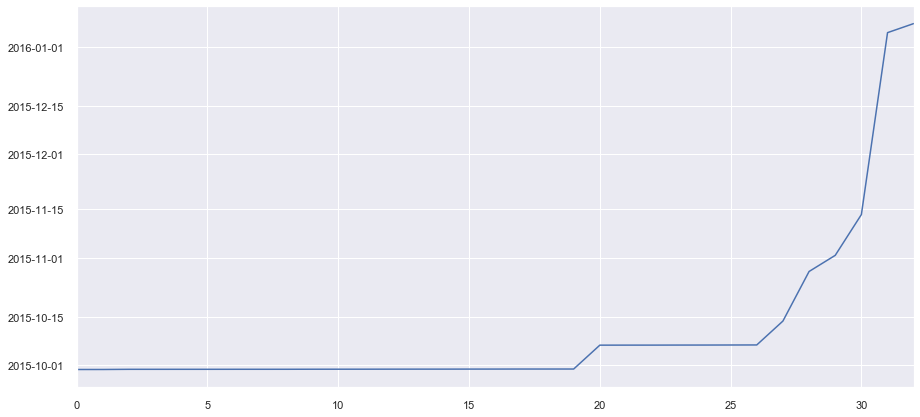

In [201]:
fig, ax = plt.subplots(figsize=(15,7))
date_mode.plot(ax=ax)

In [ ]:
tox_hour = pd.to_datetime(data.timestamp)
toxic_time = pd.Series(data=np.array(data.toxic), 
                           index=pd.DatetimeIndex(temperature_time_arr), dtype="float")

In [ ]:
ts_temperature_hour = ts_temperature.resample("H").mean()

In [ ]:
ax = plt.figure(figsize=(5,2), dpi=150).add_subplot(111)
ts_temperature_hour.plot(ax=ax, title="Temperature per hour", color="red")